The purpose of this notebook is the check for multicollinearity among features of a propensity model.

In [5]:
# authenication libraries for colab & bigquery tools
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()

from google.cloud.bigquery import magics
magics.context.project = '{project-name}' #list BQ project name
client = bigquery.Client(project=magics.context.project)

In [6]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# import data
%%bigquery df
SELECT *
FROM `mydataset.input_data`;

Query is running:   0%|          |

Downloading:   0%|          |

In [8]:
df.head()

fullVisitorId  labels  first_conversion_session  \
0  9038054632797276134       0                      <NA>   
1  0800374368673389784       0                      <NA>   
2  8238303827201021465       0                      <NA>   
3   116273025008307607       0                      <NA>   
4  2975999808191797703       0                      <NA>   

       last_visit_timestamp last_conversion_timestamp  \
0 2016-12-02 16:03:27+00:00                       NaT   
1 2017-03-08 03:45:38+00:00                       NaT   
2 2017-04-20 01:11:01+00:00                       NaT   
3 2016-11-14 01:20:38+00:00                       NaT   
4 2017-03-20 15:04:07+00:00                       NaT   

      front_lookback_window       end_lookback_window  timeOnSite_per_visit  \
0 2016-11-02 16:03:27+00:00 2016-12-02 16:03:27+00:00                2411.0   
1 2017-02-06 03:45:38+00:00 2017-03-08 03:45:38+00:00                  89.0   
2 2017-03-21 01:11:01+00:00 2017-04-20 01:11:01+00:00                 659.0   
3 2016-10-15 01:20:38+00:00 2016-11-14 01:20:38+00:00                  70.0   
4 2017-02-18 15:04:07+00:00 2017-03-20 15:04:07+00:00                  13.0   

   timeOnSite_per_page  device_deviceCategory_mobile  ...  \
0            96.440000                             0  ...   
1            16.181818                             1  ...   
2            59.909091                             1  ...   
3            35.000000                             0  ...   
4             4.333333                             0  ...   

   geoNetworkmetro_TallahasseeFLThomasvilleGA  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   geoNetworkmetro_TampaStPetersburgSarasotaFL  geoNetworkmetro_TriCitiesTNVA  \
0                                            0                              0   
1                                            0                              0   
2                                            0                              0   
3                                            0                              0   
4                                            0                              0   

   geoNetworkmetro_TucsonSierraVistaAZ  geoNetworkmetro_TulsaOK  \
0                                    0                        0   
1                                    0                        0   
2                                    0                        0   
3                                    0                        0   
4                                    0                        0   

   geoNetworkmetro_UticaNY  geoNetworkmetro_WashingtonDCHagerstownMD  \
0                        0                                         0   
1                        0                                         0   
2                        0                                         0   
3                        0                                         0   
4                        0                                         0   

   geoNetworkmetro_WheelingWVSteubenvilleOH        day       daypart  
0                                         0     Friday  morning_6_11  
1                                         0    Tuesday   lunch_11_14  
2                                         0  Wednesday          None  
3                                         0     Sunday          None  
4                                         0     Monday          None  

[5 rows x 122 columns]

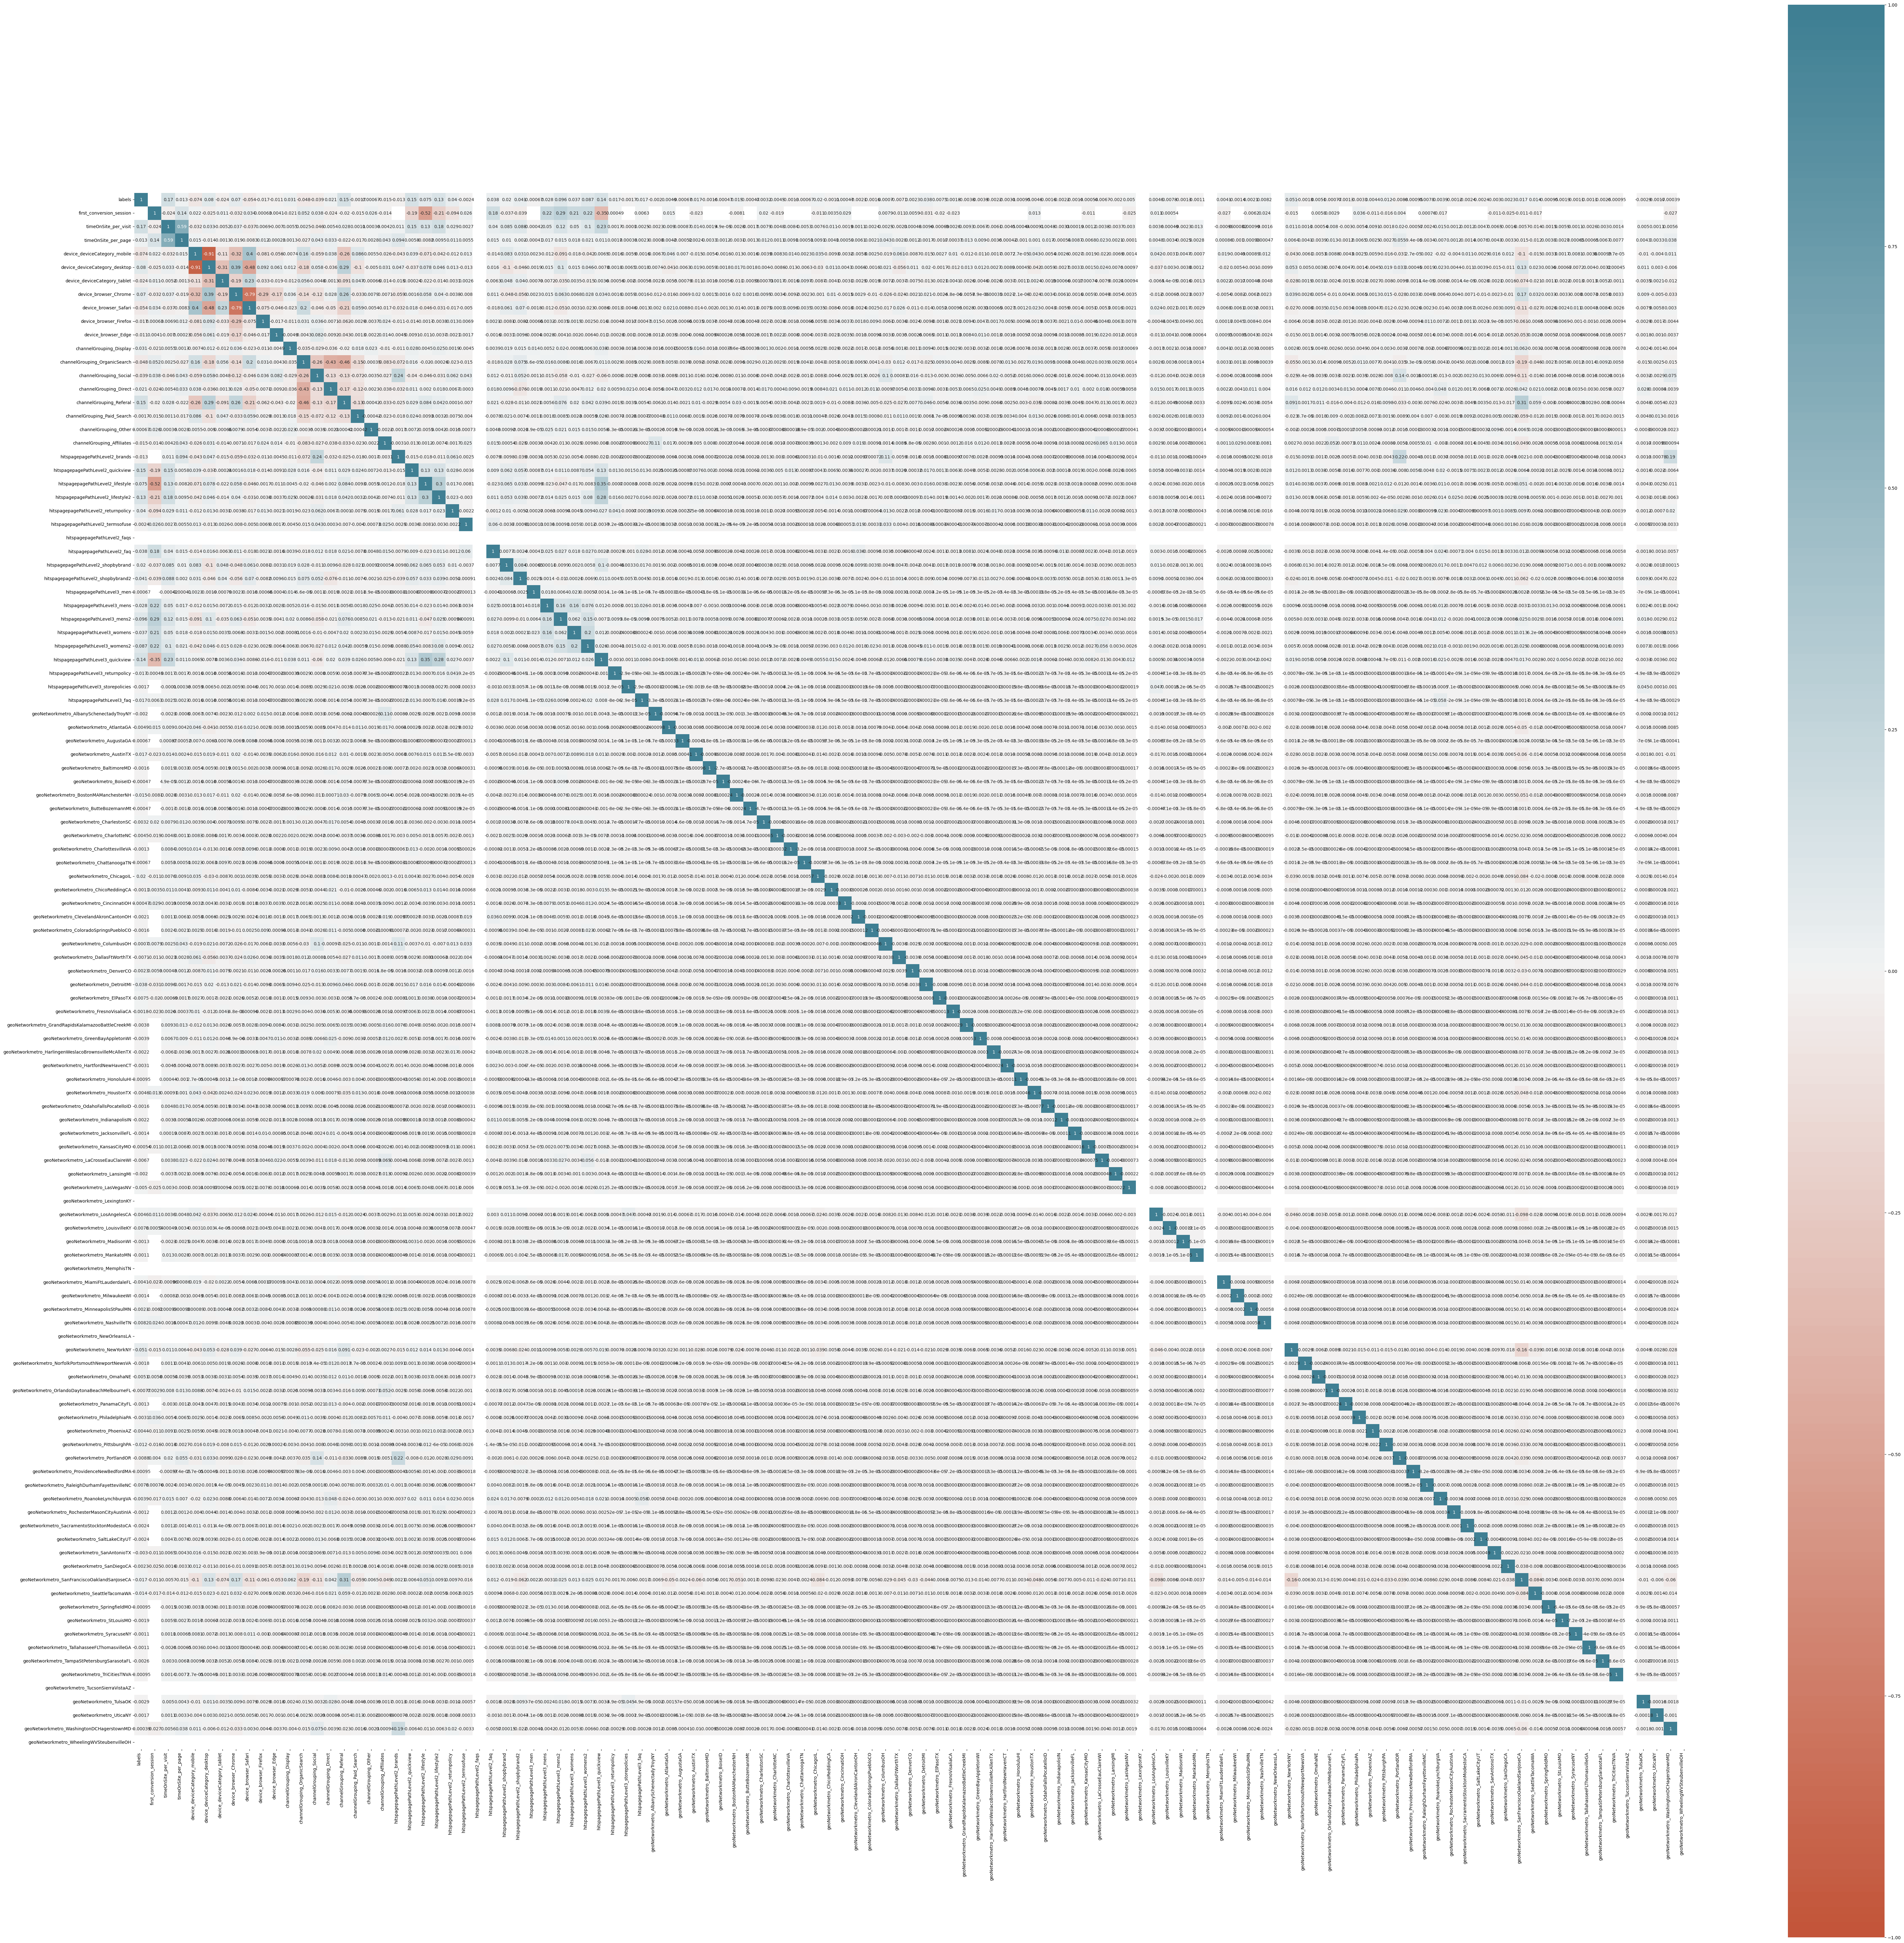

In [9]:
# run correlation heatmap to test for multicollinearity (green = positive, red = negative)
fig, ax = plt.subplots(figsize=(80,80))

ax = sns.heatmap(
    df.corr(),
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    # rotation=45,
    horizontalalignment='right'
);

High negative correlation between:

*   device category desktop / mobile (-0.91)
*   device browser safari / chrome (-0.79)